- どんな地域で徒歩の交通量が多くなるのか考え、学校や商業などの施設が集まる地域なのではないかと仮説を立てた
- 国土数値情報で提供されている施設等の点データのうち、徒歩の交通量に関係しているのではないかと判断したもの(文化施設、学校、都市公園、- ニュータウン、集客施設、バス停留所、鉄道駅)をダウンロードした
- QGISを使って、頂いたポリゴンデータと上記の点データを重ねて区域内の点の数をカウントし、データに加えた
- さらに、電車やバス、車、自転車のトリップ数との相互関係もあるではないかと考えた

In [5]:
import pandas as pd

In [7]:
persontrip = pd.read_csv('person trip data.csv')
persontrip.head()

,S05a_001,S05a_002,S05a_003,S05a_004,S05a_005,S05a_006,S05a_007,S05a_008,S05a_009,train,...,S05a_033,foot,S05a_035,cultural,school,park,newtown,customer,busstop,station
0,1,2008,1,123,36732,6360,16336,6341,26432,92201,...,37561,89173,256026,12,35,21,0,2,23,21
1,1,2008,1,124,3568,892,2180,902,6426,13968,...,2670,6512,33954,11,3,3,1,1,46,0
2,1,2008,1,130,22260,3694,8259,2609,9703,46525,...,15997,39275,131513,2,9,58,0,0,32,2
3,1,2008,1,131,29093,5153,12648,7234,25663,79791,...,32615,78730,273717,14,18,78,0,1,39,5
4,1,2008,1,132,7314,1543,5807,4054,21689,40407,...,8496,20970,133225,22,10,38,0,2,37,4


In [8]:
columns = ['foot','train','bus','car','bicycle','cultural','school','park','newtown','customer','busstop','station']
persontrip = persontrip[columns]
persontrip.head()

,foot,train,bus,car,bicycle,cultural,school,park,newtown,customer,busstop,station
0,89173,92201,2892,18539,53221,12,35,21,0,2,23,21
1,6512,13968,1645,7061,4768,11,3,3,1,1,46,0
2,39275,46525,7262,14528,23923,2,9,58,0,0,32,2
3,78730,79791,13249,27552,74395,14,18,78,0,1,39,5
4,20970,40407,3543,33128,35177,22,10,38,0,2,37,4


- とりあえず個々の要素と徒歩の交通量との関係を見てみる

In [9]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D5708A54A8>,
      dtype=object)

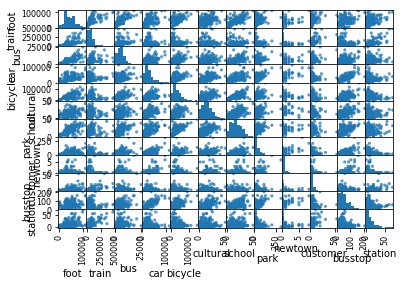

In [11]:
scatter_matrix(persontrip)

In [12]:
persontrip.corr().round(3)

,foot,train,bus,car,bicycle,cultural,school,park,newtown,customer,busstop,station
foot,1.000,0.616,0.711,0.420,0.597,0.330,0.655,0.358,0.108,0.415,0.338,0.341
train,0.616,1.000,0.321,0.064,-0.094,0.024,0.100,-0.131,-0.124,0.638,-0.066,0.713
bus,0.711,0.321,1.000,0.345,0.490,0.257,0.541,0.399,0.148,0.372,0.428,0.098
car,0.420,0.064,0.345,1.000,0.428,0.513,0.528,0.656,0.610,0.037,0.754,-0.155
bicycle,0.597,-0.094,0.490,0.428,1.000,0.472,0.694,0.429,0.030,-0.076,0.542,-0.226
cultural,0.330,0.024,0.257,0.513,0.472,1.000,0.501,0.358,0.245,0.057,0.532,-0.117
school,0.655,0.100,0.541,0.528,0.694,0.501,1.000,0.497,0.271,0.003,0.559,0.046
park,0.358,-0.131,0.399,0.656,0.429,0.358,0.497,1.000,0.619,-0.111,0.591,-0.288
newtown,0.108,-0.124,0.148,0.610,0.030,0.245,0.271,0.619,1.000,-0.095,0.470,-0.200
customer,0.415,0.638,0.372,0.037,-0.076,0.057,0.003,-0.111,-0.095,1.000,0.037,0.461


- このなかで徒歩の交通量と比較的強い相関を持っているのは、電車のトリップ数、バスのトリップ数、自転車のトリップ数、学校の数くらいである
- また、電車のトリップ数と集客施設の数、電車のトリップ数と駅の数、車のトリップ数と公園の数、車のトリップ数とニュータウンの数、車のトリップ数とバス停留所の数、自転車のトリップ数と学校の数、公園の数とニュータウンの数の間にはそれぞれやや強い相関がみられるため、重回帰分析においてこれらの組を独立変数として同時に取り入れることは好ましくないと考えられる
- 以上を踏まえて、電車のトリップ数、バスのトリップ数、文化施設の数、学校の数、公園の数、バス停留所の数を変数としてみる

In [14]:
columns2 = ['foot','train','bus','cultural','school','park','busstop']
persontrip = persontrip[columns2]
persontrip.head()

,foot,train,bus,cultural,school,park,busstop
0,89173,92201,2892,12,35,21,23
1,6512,13968,1645,11,3,3,46
2,39275,46525,7262,2,9,58,32
3,78730,79791,13249,14,18,78,39
4,20970,40407,3543,22,10,38,37


- 次に各変数のp値を見てみる

In [15]:
from scipy.stats import pearsonr, linregress

In [16]:
pearsonr(persontrip['foot'],persontrip['train'])

(0.6160371805478145, 1.1747822961163134e-35)

In [17]:
pearsonr(persontrip['foot'],persontrip['bus'])

(0.7106600684306732, 1.0169489986038211e-51)

In [18]:
pearsonr(persontrip['foot'],persontrip['cultural'])

(0.32995937786871393, 9.045689040734031e-10)

In [19]:
pearsonr(persontrip['foot'],persontrip['school'])

(0.655493258381218, 1.1887426652750885e-41)

In [20]:
pearsonr(persontrip['foot'],persontrip['park'])

(0.3576894663019658, 2.464941738346856e-11)

In [21]:
pearsonr(persontrip['foot'],persontrip['busstop'])

(0.3375795892652347, 3.4815046480340847e-10)

- p値は十分に小さい

- 各変数を正規化して重回帰分析を行う

In [23]:
import numpy as np

In [24]:
persontrip2 = persontrip.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
persontrip2.head()

,foot,train,bus,cultural,school,park,busstop
0,0.383667,0.013533,-0.125612,-0.068659,0.352787,-0.058624,-0.165630
1,-0.357036,-0.148470,-0.173897,-0.088659,-0.300274,-0.117448,-0.051769
2,-0.063455,-0.081052,0.043597,-0.268659,-0.177825,0.062291,-0.121076
3,0.290090,-0.012165,0.275418,-0.028659,0.005849,0.127650,-0.086422
4,-0.227482,-0.093721,-0.100405,0.131341,-0.157417,-0.003069,-0.096323


In [25]:
clf = linear_model.LinearRegression()

variable2 = persontrip2.drop("foot", axis=1)
x = variable2.as_matrix()
 
y = persontrip2['foot'].as_matrix()
 
clf.fit(x, y)
  
print(pd.DataFrame({"Name":variable2.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
print(clf.intercept_)

   Coefficients      Name
2      0.037893  cultural
5      0.097905   busstop
4      0.216724      park
1      0.398656       bus
3      0.410898    school
0      0.596535     train
4.2791004954959246e-17


- 各変数の係数は↑のようになり、Excelでも確かめてみたところ決定係数は0.81程度となった

# 明らかにになったこと
- 徒歩の交通量と電車の交通量、学校の数、バスの交通量、公園の数、バスの停留所の数、文化施設の数の間には相関があり、特に電車の交通量、学校の数、バスの交通量、公園の数との相関が強い

# 分析を通して考えたこと
- 私は新宿や渋谷などを思い浮かべて、集客施設の集まるところに徒歩の交通量も集中するのではないかと考えたが、実際に分析をしてみるとさほど強い相関は見られなく、非常に意外であった
- 一方で、学校や公園といった日常的に利用する施設の周辺に徒歩の交通が多く発生している
- 以上のことから、人が集中するイメージはあるが実際に毎日利用するわけではない商業空間などよりも、毎日確実に通勤または通学する学校やオフィスなどが集まっている地域のほうが徒歩の交通量が多いのではないかと考えた

# よりよいモデルをつくるためには
- 上記を踏まえると、社会人が毎日通うオフィスビルなどの施設の数を変数として取り入れるとよりよいモデルになるのではないかと考えた

# 補足
- 変数同士の相関係数を見た際に、電車のトリップ数と駅の数の間に強い相関がみられるのは当たり前のことであるかもしれないが、電車のトリップ数と集客施設の数、車のトリップ数とニュータウンの数、自転車のトリップ数と学校の数の間に強い相関が見られたのは、'なるほどやはりそうなのか'と納得でき、数値と現実とが結びついた感触があって興味深かった
- さらに、ニュータウンは公開空地を併設することが多いため、公園の数とニュータウンの数の間に強い相関が見られたことも納得であった